<a href="https://colab.research.google.com/github/nagelamartins/imersao_alura_dados_python/blob/main/imers%C3%A3o_alura_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1 - Explore dados com Pandas

## Importando a biblioteca e os dados

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

## Entendendo melhor o Dataframe

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


## Trabalhando com dados numéricos

In [ ]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [ ]:
df.shape

(133349, 11)

Para deixar a informação trazida pela função `shape` mais fácil de ser compreendida, é possível atribuir cada um dos valores de linha e coluna a uma variável e, após isso, associá-las a um texto usando `print`:

In [ ]:
linhas, colunas = df.shape[0], df.shape[1]
print("Quantidade de linhas:", linhas)
print("Quantidade de colunas:", colunas)

Quantidade de linhas: 133349
Quantidade de colunas: 11


In [ ]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

As colunas, por enquanto, estão com seus nomes em inglês e, para facilitar a compreensão, convém traduzi-las. O Gemini (IA) será utilizado para auxiliar na tradução através do prompt:
> Traduza para português brasileiro os nomes das colunas do dataframe armazenado na variável `df`, e crie um dicionário onde as chaves serão os nomes originais e os valores serão os nomes traduzidos. Armazene esse dicionário em uma variável chamada `renomear_colunas`.

Antes de aceitar e executar o código, foi feita a revisão da resposta gerada, e alguns dos nomes foram alterados.

In [ ]:
renomear_colunas = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda_salario',
    'salary_in_usd': 'salario_em_dolar',
    'employee_residence': 'residencia_empregado',
    'remote_ratio': 'remoto',
    'company_location': 'localizacao_empresa',
    'company_size': 'tamanho_empresa'
}

df = df.rename(columns=renomear_colunas)
df.columns

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda_salario',
       'salario_em_dolar', 'residencia_empregado', 'remoto',
       'localizacao_empresa', 'tamanho_empresa'],
      dtype='object')

## Trabalhando com dados categóricos

In [ ]:
df['senioridade'].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


Convém, também, traduzir e renomear os nomes das categorias. Novamente o Gemini foi utilizado para auxiliar nessa tarefa, com posterior revisão do dicionário gerado por ele.
O prompt utilizado foi:


> Traduza para português brasileiro os nomes das categorias da coluna 'senioridade' do dataframe armazenado na variável `df`, e crie um dicionário onde as chaves serão os nomes originais e os valores serão os nomes traduzidos. Armazene esse dicionário em uma variável chamada `renomear_senioridade`.



In [ ]:
renomear_senioridade = {
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
}

df["senioridade"]=df["senioridade"].replace(renomear_senioridade)
df['senioridade'].value_counts()

,count
senioridade,
Senior,77241
Pleno,40465
Junior,12443
Executivo,3200


O mesmo é feito com as categorias da coluna "contrato", através do prompt:

> Traduza para português brasileiro os nomes das categorias da coluna 'contrato' do dataframe armazenado na variável `df`, e crie um dicionário onde as chaves serão os nomes originais e os valores serão os nomes traduzidos. Armazene esse dicionário em uma variável chamada `renomear_contrato`.



In [ ]:
renomear_contrato = {
    'FT': 'Integral',
    'CT': 'Contrato Temporario',
    'FL': 'Freelancer',
    'PT': 'Tempo Parcial'
}

df["contrato"] = df["contrato"].replace(renomear_contrato)
df['contrato'].value_counts()

,count
contrato,
Integral,132563
Contrato Temporario,394
Tempo Parcial,376
Freelancer,16


Para as categorias da coluna "remoto", é usado o prompt:

> Traduza para português brasileiro os nomes das categorias da coluna 'remoto' do dataframe armazenado na variável `df`, e crie um dicionário onde as chaves serão os nomes originais e os valores serão os nomes traduzidos. Armazene esse dicionário em uma variável chamada `renomear_remoto`.




In [ ]:
renomear_remoto = {
    0: 'Presencial',
    50: 'Hibrido',
    100: 'Remoto'
}

df["remoto"] = df["remoto"].replace(renomear_remoto)
df['remoto'].value_counts()

,count
remoto,
Presencial,105312
Remoto,27718
Hibrido,319


Por fim, o prompt usado para a coluna "tamanho_empresa" é:
> Traduza para português brasileiro os nomes das categorias da coluna 'tamanho_empresa' do dataframe armazenado na variável `df`, e crie um dicionário onde as chaves serão os nomes originais e os valores serão os nomes traduzidos. Armazene esse dicionário em uma variável chamada `renomear_tamanho_empresa`.





In [ ]:
renomear_tamanho_empresa = {
    'S': 'Pequena',
    'M': 'Media',
    'L': 'Grande'
}

df["tamanho_empresa"] = df["tamanho_empresa"].replace(renomear_tamanho_empresa)
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
Media,129561
Grande,3574
Pequena,214


In [ ]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda_salario,salario_em_dolar,residencia_empregado,remoto,localizacao_empresa,tamanho_empresa
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025.0,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


In [ ]:
df.describe(include="object")

,senioridade,contrato,cargo,moeda_salario,residencia_empregado,remoto,localizacao_empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Integral,Data Scientist,USD,US,Presencial,US,Media
freq,77241,132563,17314,126140,119579,105312,119641,129561


# Aula 2 - Aprenda a limpar e preparar os dados

## Verificando dados nulos

In [ ]:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda_salario,salario_em_dolar,residencia_empregado,remoto,localizacao_empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda_salario,0
salario_em_dolar,0
residencia_empregado,0
remoto,0
localizacao_empresa,0


In [ ]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [ ]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda_salario,salario_em_dolar,residencia_empregado,remoto,localizacao_empresa,tamanho_empresa
5588,NaN,Senior,Integral,Product Manager,184500,USD,184500,US,Presencial,US,Media
59692,NaN,Pleno,Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Media
59710,NaN,Junior,Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Media
59759,NaN,Senior,Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Media
59789,NaN,Senior,Integral,Engineer,112000,USD,112000,US,Presencial,US,Media
131000,NaN,Senior,Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Media
131006,NaN,Senior,Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Media
133054,NaN,Junior,Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Integral,Data Scientist,130000,USD,130000,US,Hibrido,US,Grande


## Possíveis tratamentos para esses dados nulos:

### 1. Preenchê-los com a média ou a mediana.

Para exemplificar, é criado um novo dataframe com alguns dados de nomes e salários.

In [ ]:
import numpy as np

In [ ]:
df_salarios = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Daniele', 'Val'],
    'salario': [4000, np.nan, 5000, np.nan, 100000]
})
df_salarios

,nome,salario
0,Ana,4000.0
1,Bruno,NaN
2,Carlos,5000.0
3,Daniele,NaN
4,Val,100000.0


In [ ]:
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())
df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


### 2. Repetir outro valor do dataframe no dado que está nulo

Novamente, é criado outro dataframe para exemplificar

In [ ]:
df_temperaturas = pd.DataFrame({
    'dia_semana': ['Seg', 'Ter', 'Qua', 'Qui', 'Sex'],
    'temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas

,dia_semana,temperatura
0,Seg,30.0
1,Ter,NaN
2,Qua,NaN
3,Qui,28.0
4,Sex,27.0


In [ ]:
df_temperaturas['preenchido_ffill'] = df_temperaturas['temperatura'].ffill()
df_temperaturas['preenchido_bfill'] = df_temperaturas['temperatura'].bfill()
df_temperaturas

# O ffill (forward fill) preenche o campo com o mesmo dado que está no campo anterior.
# o bfill (back fill) preenche com o dado do próximo campo.

,dia_semana,temperatura,preenchido_ffill,preenchido_bfill
0,Seg,30.0,30.0,30.0
1,Ter,NaN,30.0,28.0
2,Qua,NaN,30.0,28.0
3,Qui,28.0,28.0,28.0
4,Sex,27.0,27.0,27.0


### 3. Preencher com um valor fixo (ex: 'não informado')

Usado um dataframe de exemplo com preenchimento de um campo de cidades.

In [ ]:
df_cidades = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Daniele', 'Val'],
    'cidade': ['São Paulo', np.nan, 'Campinas', np.nan, 'Belém']
})

df_cidades

,nome,cidade
0,Ana,São Paulo
1,Bruno,NaN
2,Carlos,Campinas
3,Daniele,NaN
4,Val,Belém


In [ ]:
df_cidades['cidade_preenchida'] = df_cidades['cidade'].fillna('Não informado')
df_cidades

,nome,cidade,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Carlos,Campinas,Campinas
3,Daniele,NaN,Não informado
4,Val,Belém,Belém


### 4. Deletar os dados faltantes

É utilizado o dataframe original (`df`), porém, as alterações são inseridas em uma nova variável para não ocasionar em perdas dos dados originais.




In [ ]:
df_limpo = df.dropna() # deleta as linhas que possuem dados nulos
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda_salario,0
salario_em_dolar,0
residencia_empregado,0
remoto,0
localizacao_empresa,0


## Corrigindo o tipo das variáveis


In [ ]:
df_limpo.head() # a variável 'ano' está com uma casa decimal

,ano,senioridade,contrato,cargo,salario,moeda_salario,salario_em_dolar,residencia_empregado,remoto,localizacao_empresa,tamanho_empresa
0,2025.0,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025.0,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025.0,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025.0,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025.0,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


In [ ]:
df_limpo.info() # isto porque o tipo dela é 'float64'

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ano                   133339 non-null  float64
 1   senioridade           133339 non-null  object 
 2   contrato              133339 non-null  object 
 3   cargo                 133339 non-null  object 
 4   salario               133339 non-null  int64  
 5   moeda_salario         133339 non-null  object 
 6   salario_em_dolar      133339 non-null  int64  
 7   residencia_empregado  133339 non-null  object 
 8   remoto                133339 non-null  object 
 9   localizacao_empresa   133339 non-null  object 
 10  tamanho_empresa       133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [ ]:
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64')) # o tipo foi alterado para int

In [ ]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ano                   133339 non-null  int64 
 1   senioridade           133339 non-null  object
 2   contrato              133339 non-null  object
 3   cargo                 133339 non-null  object
 4   salario               133339 non-null  int64 
 5   moeda_salario         133339 non-null  object
 6   salario_em_dolar      133339 non-null  int64 
 7   residencia_empregado  133339 non-null  object
 8   remoto                133339 non-null  object
 9   localizacao_empresa   133339 non-null  object
 10  tamanho_empresa       133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


In [ ]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda_salario,salario_em_dolar,residencia_empregado,remoto,localizacao_empresa,tamanho_empresa
0,2025,Senior,Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025,Senior,Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025,Pleno,Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025,Pleno,Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025,Junior,Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


# Aula 3 - Crie gráficos e conte histórias com dados

## Gráficos estáticos

<Axes: title={'center': 'Distribuição de senioridade'}, xlabel='senioridade'>

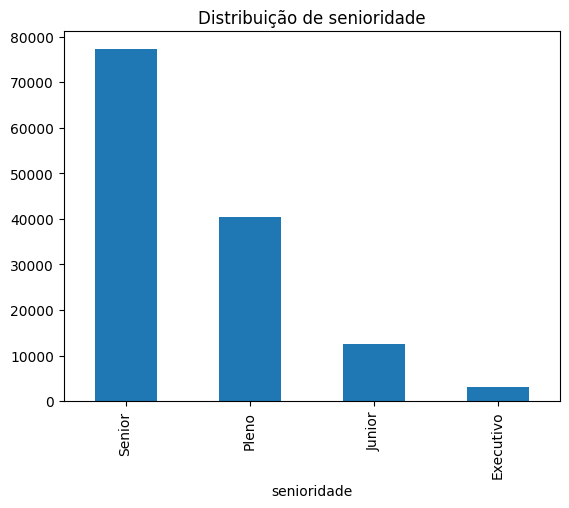

In [ ]:
df_limpo['senioridade'].value_counts().plot(kind = 'bar', title = "Distribuição de senioridade")

A biblioteca Pandas permite plotar gráficos, porém eles não são muito custumizáveis. Por isso, costumam-se usar outras bibliotecas. As principais são a Seaborn e a Matplotlib

In [ ]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='salario_em_dolar'>

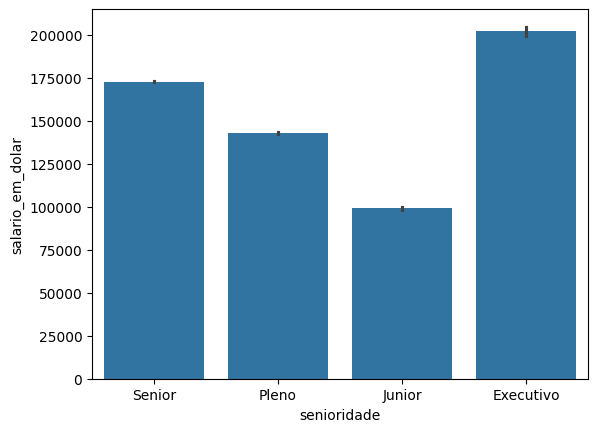

In [ ]:
sns.barplot(data = df_limpo, x = 'senioridade', y = 'salario_em_dolar')

Para compreender melhor o gráfico, é interessante inserir informações como o seu título, bem como os nomes dos eixos x e y.   
Para isso, costuma-se utilizar as bibliotecas seaborn e matplotlib (módulo pyplot) em conjunto.

In [ ]:
import matplotlib.pyplot as plt

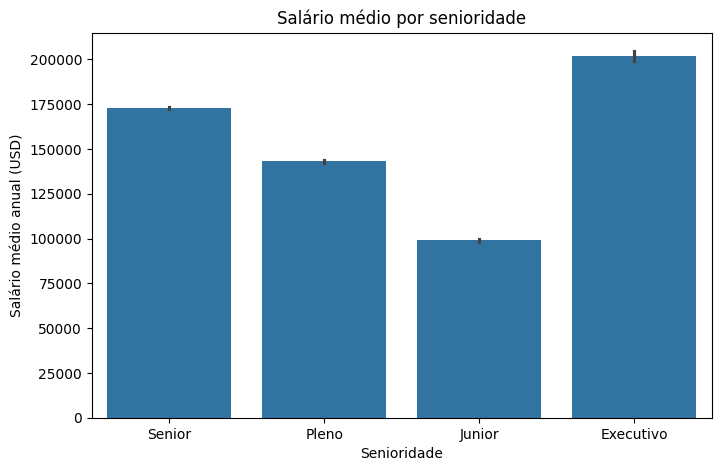

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data = df_limpo, x = 'senioridade', y = 'salario_em_dolar')
plt.title("Salário médio por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário médio anual (USD)")
plt.show()

Para ordenar as barras em ordem decrescente, é possível utilizar o método `groupby` da biblioteca pandas.




In [ ]:
df_limpo.groupby('senioridade')['salario_em_dolar'].mean().sort_values(ascending = False)

,salario_em_dolar
senioridade,
Executivo,202027.667813
Senior,172850.838301
Pleno,143044.845979
Junior,99034.963267


In [ ]:
ordem = df_limpo.groupby('senioridade')['salario_em_dolar'].mean().sort_values(ascending = False).index #armazena os valores em uma variável
ordem

Index(['Executivo', 'Senior', 'Pleno', 'Junior'], dtype='object', name='senioridade')

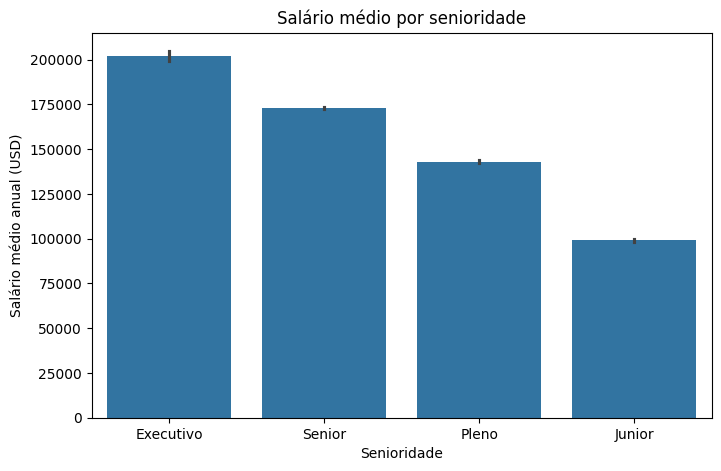

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data = df_limpo, x = 'senioridade', y = 'salario_em_dolar', order = ordem)
plt.title("Salário médio por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário médio anual (USD)")
plt.show()

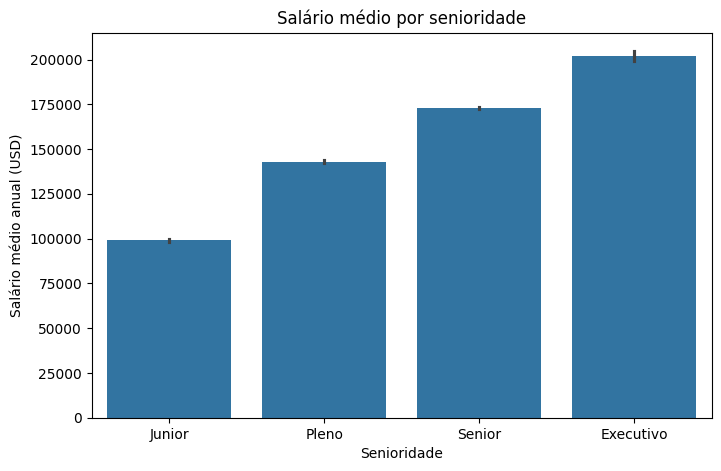

In [ ]:
ordem_crescente = df_limpo.groupby('senioridade')['salario_em_dolar'].mean().sort_values(ascending = True).index

plt.figure(figsize=(8,5))
sns.barplot(data = df_limpo, x = 'senioridade', y = 'salario_em_dolar', order = ordem_crescente)
plt.title("Salário médio por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário médio anual (USD)")
plt.show()

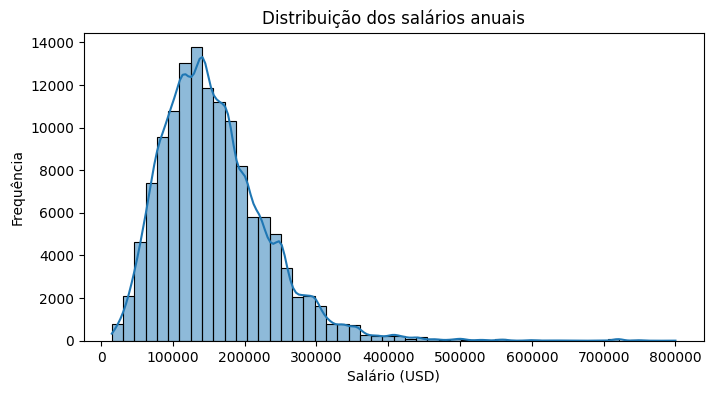

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df_limpo['salario_em_dolar'], bins = 50, kde = True)
plt.title("Distribuição dos salários anuais")
plt.xlabel("Salário (USD)")
plt.ylabel("Frequência")
plt.show()


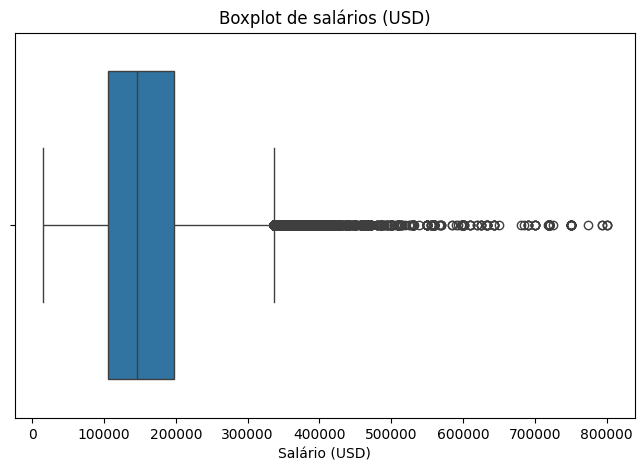

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_limpo['salario_em_dolar'])
plt.title("Boxplot de salários (USD)")
plt.xlabel("Salário (USD)")
plt.show()


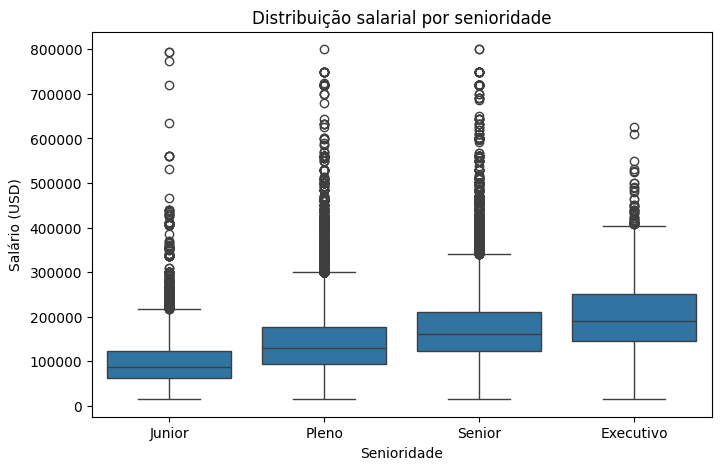

In [ ]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='salario_em_dolar', data=df_limpo, order=ordem_senioridade)
plt.title("Distribuição salarial por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário (USD)")
plt.show()

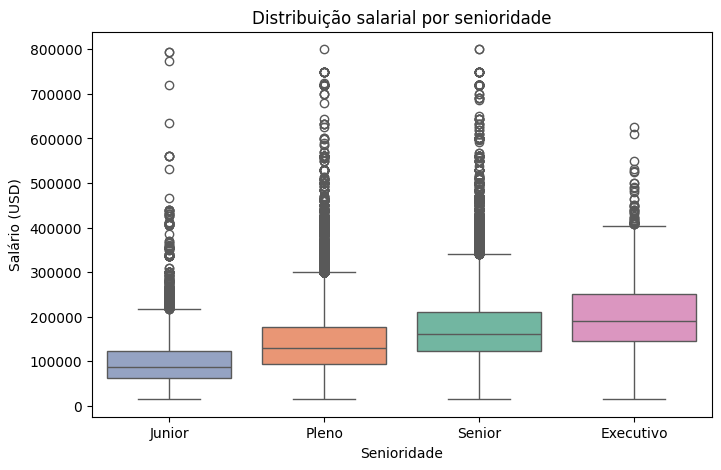

In [ ]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='salario_em_dolar', data=df_limpo, order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title("Distribuição salarial por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salário (USD)")
plt.show()

## Gráficos interativos

In [ ]:
import plotly.express as px

Para o teste inicial, é criado um gráfico com a ajuda do Gemini, utilizando o seguinte prompt:
> Crie um gráfico de barras usando protly que apresente a média salárial por senioridade.



In [ ]:
fig = px.bar(df_limpo.groupby('senioridade')['salario_em_dolar'].mean().reset_index(),
             x='senioridade',
             y='salario_em_dolar',
             title='Média Salarial por Senioridade (USD)',
             labels={'senioridade': 'Senioridade', 'salario_em_dolar': 'Salário Médio Anual (USD)'})
fig.show()

In [ ]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names = 'tipo_trabalho',
             values = 'quantidade',
             title = 'Proporção dos tipos de trabalho')
fig.show()

In [ ]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names = 'tipo_trabalho',
             values = 'quantidade',
             title = 'Proporção dos tipos de trabalho',
             hole = 0.5)
fig.show()

In [ ]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names = 'tipo_trabalho',
             values = 'quantidade',
             title = 'Proporção dos tipos de trabalho',
             hole = 0.5)
fig.update_traces(textinfo='percent+label')
fig.show()

### Desafio proposto:

Criar uma visualização interativa que apresente a média salarial de um cientista de dados de acordo com o seu país.

In [ ]:
df_cientista_dados = df_limpo[df_limpo['cargo'] == 'Data Scientist'] #cria um novo dataframe somente com o cargo 'Cientista de Dados'
df_cientista_dados.groupby('localizacao_empresa')['salario_em_dolar'].mean() #mostra a média salarial por país de localização da empresa

,salario_em_dolar
localizacao_empresa,
AD,50745.000000
AR,37500.000000
AT,50359.101695
AU,112190.000000
BE,66790.750000
BG,152500.000000
BR,71093.000000
CA,140597.312977
CH,152256.666667


Gemini utilizado para criar um dicionário com a tradução dos nomes dos países. Foi usado o prompt:
> Traduza para português brasileiro cada um dos países (categorias) da coluna
`localizacao_empresa` do dataframe `df_cientista_dados`.



In [ ]:
traduzir_paises = {
    'US': 'Estados Unidos',
    'AU': 'Austrália',
    'CA': 'Canadá',
    'DE': 'Alemanha',
    'GB': 'Reino Unido',
    'IN': 'Índia',
    'FR': 'França',
    'ES': 'Espanha',
    'BR': 'Brasil',
    'JP': 'Japão',
    'NL': 'Holanda',
    'CH': 'Suíça',
    'AT': 'Áustria',
    'RU': 'Rússia',
    'SG': 'Singapura',
    'IR': 'Irã',
    'CO': 'Colômbia',
    'DK': 'Dinamarca',
    'SE': 'Suécia',
    'IT': 'Itália',
    'PL': 'Polônia',
    'HR': 'Croácia',
    'EE': 'Estônia',
    'MX': 'México',
    'GR': 'Grécia',
    'PR': 'Porto Rico',
    'BO': 'Bolívia',
    'UA': 'Ucrânia',
    'IL': 'Israel',
    'NG': 'Nigéria',
    'TR': 'Turquia',
    'AE': 'Emirados Árabes Unidos',
    'MT': 'Malta',
    'DZ': 'Argélia',
    'PH': 'Filipinas',
    'MD': 'Moldávia',
    'LU': 'Luxemburgo',
    'SI': 'Eslovênia',
    'RS': 'Sérvia',
    'IE': 'Irlanda',
    'DZ': 'Argélia',
    'CL': 'Chile',
    'AR': 'Argentina',
    'AD': 'Andorra',
    'RO': 'Romênia',
    'VN': 'Vietnã',
    'CZ': 'República Tcheca',
    'BE': 'Bélgica',
    'MY': 'Malásia',
    'PK': 'Paquistão',
    'TH': 'Tailândia',
    'KE': 'Quênia',
    'BG': 'Bulgária',
    'SI': 'Eslovênia',
    'EE': 'Estônia',
    'LV': 'Letônia',
    'HR': 'Croácia',
    'RS': 'Sérvia',
    'JE': 'Jersey',
    'LT': 'Lituânia',
    'FI': 'Finlândia',
    'SK': 'Eslováquia',
    'NZ': 'Nova Zelândia',
    'CR': 'Costa Rica',
    'HK': 'Hong Kong',
    'HU': 'Hungria',
    'EC': 'Equador',
    'TW': 'Taiwan',
    'IE': 'Irlanda',
    'MK': 'Macedônia do Norte',
    'KR': 'Coreia do Sul',
    'CY': 'Chipre',
    'BA': 'Bósnia e Herzegovina',
    'IR': 'Irã',
    'AS': 'Samoa Americana',
    'IQ': 'Iraque',
    'AM': 'Armênia',
    'CR': 'Costa Rica',
    'CA': 'Canadá',
    'ZA': 'África do Sul',
    'EG': 'Egito',
    'ID': 'Indonésia',
    'UA': 'Ucrânia',
    'CL': 'Chile',
    'MX': 'México',
    'MD': 'Moldávia',
    'JP': 'Japão',
    'NL': 'Holanda',
    'MT': 'Malta',
    'LU': 'Luxemburgo',
    'RU': 'Rússia',
    'SG': 'Singapura',
    'DK': 'Dinamarca',
    'SI': 'Eslovênia',
    'PT': 'Portugal',
    'NO': 'Noruega'
}

df_cientista_dados['localizacao_empresa'] = df_cientista_dados['localizacao_empresa'].replace(traduzir_paises)

/tmp/ipython-input-4089106621.py:100: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig_desafio = px.bar(df_cientista_dados.groupby('localizacao_empresa')['salario_em_dolar'].mean().sort_values(ascending=False).reset_index(),
            x='localizacao_empresa',
            y='salario_em_dolar',
            title='Média Salarial (USD) de Cientistas de Dados por país ',
            labels={'localizacao_empresa': 'País', 'salario_em_dolar': 'Salário Médio Anual (USD)'})

fig_desafio.show()

# Aula 4: Construa um Dashboard interativo

### Passo a passo para preparar o ambiente no VSCode, com comandos para o terminal:

1. **Criar o ambiente virtual:**  
`python3 -m venv .venv`   

  *.venv pode ser substituído pelo nome que se deseja colocar no ambiente, mas, por convenção, nomeia-se venv*

2. **Ativar o ambiente virtual:**

*   Windows:  
`.venv\Scripts\Activate`

*   MAC / Linux:  
`source .venv/bin/activate `

3. **Criar um arquivo chamado requirements.txt e adicionar os pacotes necessários:**

  *Para criar esse arquivo no VSCode: File -> New text file*
  ```
pandas==2.2.3  
streamlit==1.44.1  
plotly==5.24.1
```
  *A biblioteca streamlit, ainda não utilizada, destina-se a criação de dashboards e aplicações - criar protótipos*
  
4. **Instalar as bibliotecas necessárias:**  
`pip install -r requirements.txt`  
  *As bibliotecas foram listadas no arquivo requirements.txt, criado no passo anterior*

5. **Criar a Interface do Dashboard com Streamlit**

6. **Realizar o deploy do Dashboard no [Streamlit Cloud](https://streamlit.io/cloud)**




### Códigos para a criação do Dashboard (disponibilizados pelo time da Alura):



```
import streamlit as st
import pandas as pd
import plotly.express as px

# --- Configuração da Página ---
# Define o título da página, o ícone e o layout para ocupar a largura inteira.
st.set_page_config(
    page_title="Dashboard de Salários na Área de Dados",
    page_icon="📊",
    layout="wide",
)

# --- Carregamento dos dados ---
df = pd.read_csv("https://raw.githubusercontent.com/vqrca/dashboard_salarios_dados/refs/heads/main/dados-imersao-final.csv")

# --- Barra Lateral (Filtros) ---
st.sidebar.header("🔍 Filtros")

# Filtro de Ano
anos_disponiveis = sorted(df['ano'].unique())
anos_selecionados = st.sidebar.multiselect("Ano", anos_disponiveis, default=anos_disponiveis)

# Filtro de Senioridade
senioridades_disponiveis = sorted(df['senioridade'].unique())
senioridades_selecionadas = st.sidebar.multiselect("Senioridade", senioridades_disponiveis, default=senioridades_disponiveis)

# Filtro por Tipo de Contrato
contratos_disponiveis = sorted(df['contrato'].unique())
contratos_selecionados = st.sidebar.multiselect("Tipo de Contrato", contratos_disponiveis, default=contratos_disponiveis)

# Filtro por Tamanho da Empresa
tamanhos_disponiveis = sorted(df['tamanho_empresa'].unique())
tamanhos_selecionados = st.sidebar.multiselect("Tamanho da Empresa", tamanhos_disponiveis, default=tamanhos_disponiveis)

# --- Filtragem do DataFrame ---
# O dataframe principal é filtrado com base nas seleções feitas na barra lateral.
df_filtrado = df[
    (df['ano'].isin(anos_selecionados)) &
    (df['senioridade'].isin(senioridades_selecionadas)) &
    (df['contrato'].isin(contratos_selecionados)) &
    (df['tamanho_empresa'].isin(tamanhos_selecionados))
]

# --- Conteúdo Principal ---
st.title("🎲 Dashboard de Análise de Salários na Área de Dados")
st.markdown("Explore os dados salariais na área de dados nos últimos anos. Utilize os filtros à esquerda para refinar sua análise.")

# --- Métricas Principais (KPIs) ---
st.subheader("Métricas gerais (Salário anual em USD)")

if not df_filtrado.empty:
    salario_medio = df_filtrado['usd'].mean()
    salario_maximo = df_filtrado['usd'].max()
    total_registros = df_filtrado.shape[0]
    cargo_mais_frequente = df_filtrado["cargo"].mode()[0]
else:
    salario_medio, salario_mediano, salario_maximo, total_registros, cargo_mais_comum = 0, 0, 0, ""

col1, col2, col3, col4 = st.columns(4)
col1.metric("Salário médio", f"${salario_medio:,.0f}")
col2.metric("Salário máximo", f"${salario_maximo:,.0f}")
col3.metric("Total de registros", f"{total_registros:,}")
col4.metric("Cargo mais frequente", cargo_mais_frequente)

st.markdown("---")

# --- Análises Visuais com Plotly ---
st.subheader("Gráficos")

col_graf1, col_graf2 = st.columns(2)

with col_graf1:
    if not df_filtrado.empty:
        top_cargos = df_filtrado.groupby('cargo')['usd'].mean().nlargest(10).sort_values(ascending=True).reset_index()
        grafico_cargos = px.bar(
            top_cargos,
            x='usd',
            y='cargo',
            orientation='h',
            title="Top 10 cargos por salário médio",
            labels={'usd': 'Média salarial anual (USD)', 'cargo': ''}
        )
        grafico_cargos.update_layout(title_x=0.1, yaxis={'categoryorder':'total ascending'})
        st.plotly_chart(grafico_cargos, use_container_width=True)
    else:
        st.warning("Nenhum dado para exibir no gráfico de cargos.")

with col_graf2:
    if not df_filtrado.empty:
        grafico_hist = px.histogram(
            df_filtrado,
            x='usd',
            nbins=30,
            title="Distribuição de salários anuais",
            labels={'usd': 'Faixa salarial (USD)', 'count': ''}
        )
        grafico_hist.update_layout(title_x=0.1)
        st.plotly_chart(grafico_hist, use_container_width=True)
    else:
        st.warning("Nenhum dado para exibir no gráfico de distribuição.")

col_graf3, col_graf4 = st.columns(2)

with col_graf3:
    if not df_filtrado.empty:
        remoto_contagem = df_filtrado['remoto'].value_counts().reset_index()
        remoto_contagem.columns = ['tipo_trabalho', 'quantidade']
        grafico_remoto = px.pie(
            remoto_contagem,
            names='tipo_trabalho',
            values='quantidade',
            title='Proporção dos tipos de trabalho',
            hole=0.5
        )
        grafico_remoto.update_traces(textinfo='percent+label')
        grafico_remoto.update_layout(title_x=0.1)
        st.plotly_chart(grafico_remoto, use_container_width=True)
    else:
        st.warning("Nenhum dado para exibir no gráfico dos tipos de trabalho.")

with col_graf4:
    if not df_filtrado.empty:
        df_ds = df_filtrado[df_filtrado['cargo'] == 'Data Scientist']
        media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()
        grafico_paises = px.choropleth(media_ds_pais,
            locations='residencia_iso3',
            color='usd',
            color_continuous_scale='rdylgn',
            title='Salário médio de Cientista de Dados por país',
            labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})
        grafico_paises.update_layout(title_x=0.1)
        st.plotly_chart(grafico_paises, use_container_width=True)
    else:
        st.warning("Nenhum dado para exibir no gráfico de países.")

# --- Tabela de Dados Detalhados ---
st.subheader("Dados Detalhados")
st.dataframe(df_filtrado)
```

